# Chapter 3: Algorithm Analysis

This notebook covers the fundamental concepts of algorithm analysis, including Big O notation, performance measurement, and complexity analysis.


## 3.1 What Is Algorithm Analysis?

Algorithm analysis is the process of determining the computational complexity of algorithms. It helps us:

- Compare algorithms
- Predict performance
- Choose the best solution for a given problem

We typically analyze algorithms in terms of:

- **Time complexity**: How execution time grows with input size
- **Space complexity**: How memory usage grows with input size


## 3.2 Big-O Notation

Big-O notation describes the upper bound of an algorithm's growth rate. Common complexities:

- **O(1)**: Constant time
- **O(log n)**: Logarithmic time
- **O(n)**: Linear time
- **O(n log n)**: Linearithmic time
- **O(n²)**: Quadratic time
- **O(n³)**: Cubic time
- **O(2ⁿ)**: Exponential time


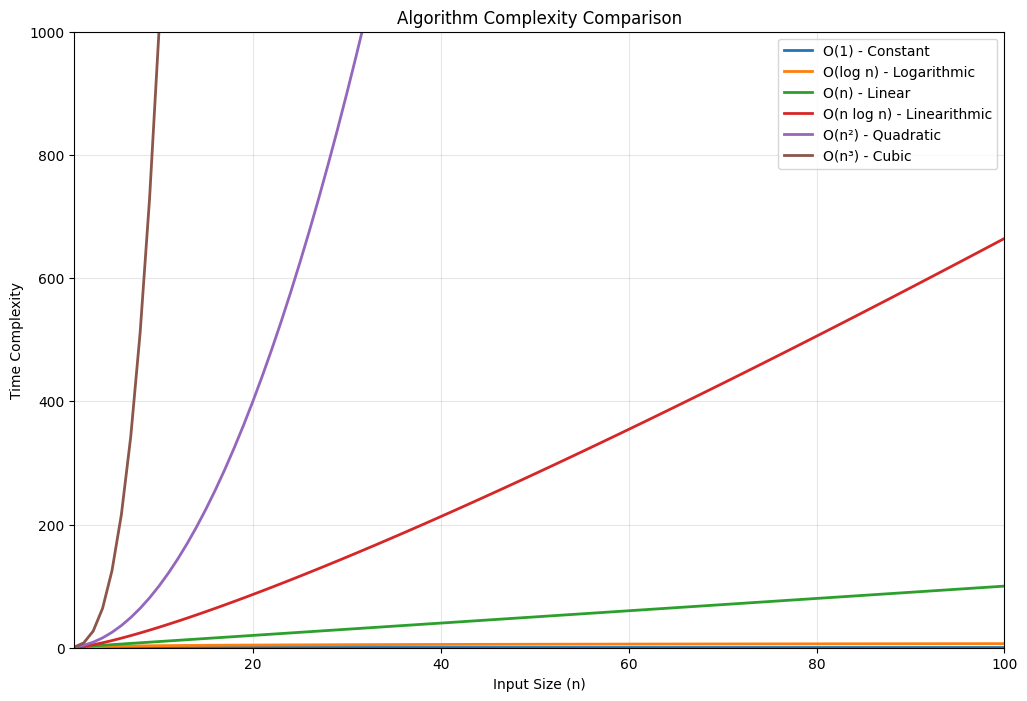

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize different complexity curves
def plot_complexity():
    n = np.linspace(1, 100, 100)
    
    plt.figure(figsize=(12, 8))
    
    # Different complexity functions
    plt.plot(n, np.ones_like(n), label='O(1) - Constant', linewidth=2)
    plt.plot(n, np.log2(n), label='O(log n) - Logarithmic', linewidth=2)
    plt.plot(n, n, label='O(n) - Linear', linewidth=2)
    plt.plot(n, n * np.log2(n), label='O(n log n) - Linearithmic', linewidth=2)
    plt.plot(n, n**2, label='O(n²) - Quadratic', linewidth=2)
    plt.plot(n, n**3, label='O(n³) - Cubic', linewidth=2)
    
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time Complexity')
    plt.title('Algorithm Complexity Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(1, 100)
    plt.ylim(0, 1000)
    plt.show()

plot_complexity()

## 3.3 An Anagram Detection Example

Let's analyze different approaches to solving the anagram detection problem.


In [ ]:
# Solution 1: Checking Off - O(n²)
def anagram_solution1(s1, s2):
    """Check if two strings are anagrams using checking off method."""
    if len(s1) != len(s2):
        return False
    
    alist = list(s2)
    
    pos1 = 0
    still_ok = True
    
    while pos1 < len(s1) and still_ok:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1
        
        if found:
            alist[pos2] = None
        else:
            still_ok = False
        
        pos1 = pos1 + 1
    
    return still_ok

print(anagram_solution1('abcd', 'dcba'))  # True
print(anagram_solution1('abcd', 'abcc'))  # False

: 

In [ ]:
# Solution 2: Sort and Compare - O(n log n)
def anagram_solution2(s1, s2):
    """Check if two strings are anagrams using sorting."""
    if len(s1) != len(s2):
        return False
    
    alist1 = list(s1)
    alist2 = list(s2)
    
    alist1.sort()
    alist2.sort()
    
    pos = 0
    matches = True
    
    while pos < len(s1) and matches:
        if alist1[pos] == alist2[pos]:
            pos = pos + 1
        else:
            matches = False
    
    return matches

print(anagram_solution2('abcd', 'dcba'))  # True
print(anagram_solution2('abcd', 'abcc'))  # False

In [ ]:
# Solution 3: Brute Force - O(n!)
def anagram_solution3(s1, s2):
    """Check if two strings are anagrams using brute force (generate all permutations)."""
    if len(s1) != len(s2):
        return False
    
    def get_permutations(s):
        if len(s) <= 1:
            return [s]
        
        permutations = []
        for i in range(len(s)):
            char = s[i]
            remaining = s[:i] + s[i+1:]
            for perm in get_permutations(remaining):
                permutations.append(char + perm)
        
        return permutations
    
    return s2 in get_permutations(s1)

# Note: This is very slow for large inputs!
print(anagram_solution3('abc', 'bca'))  # True

In [ ]:
# Solution 4: Count and Compare - O(n)
def anagram_solution4(s1, s2):
    """Check if two strings are anagrams using character counting."""
    if len(s1) != len(s2):
        return False
    
    c1 = [0] * 26
    c2 = [0] * 26
    
    for i in range(len(s1)):
        pos = ord(s1[i]) - ord('a')
        c1[pos] = c1[pos] + 1
    
    for i in range(len(s2)):
        pos = ord(s2[i]) - ord('a')
        c2[pos] = c2[pos] + 1
    
    j = 0
    still_ok = True
    while j < 26 and still_ok:
        if c1[j] == c2[j]:
            j = j + 1
        else:
            still_ok = False
    
    return still_ok

print(anagram_solution4('abcd', 'dcba'))  # True
print(anagram_solution4('abcd', 'abcc'))  # False

## 3.4 Performance of Python Data Structures

Understanding the performance characteristics of built-in data structures is crucial for writing efficient code.


In [ ]:
# List operations and their complexities
import timeit

def test_list_operations():
    """Demonstrate time complexity of list operations."""
    sizes = [1000, 2000, 4000, 8000]
    
    print("List Operation Performance:")
    print("Size\tAppend\tPrepend\tIndex\tContains")
    
    for size in sizes:
        # Create test list
        test_list = list(range(size))
        
        # Test append (O(1))
        append_time = timeit.timeit(lambda: test_list.append(999), number=1000)
        
        # Test prepend (O(n))
        prepend_time = timeit.timeit(lambda: test_list.insert(0, 999), number=100)
        
        # Test indexing (O(1))
        index_time = timeit.timeit(lambda: test_list[size//2], number=10000)
        
        # Test contains (O(n))
        contains_time = timeit.timeit(lambda: size//2 in test_list, number=1000)
        
        print(f"{size}\t{append_time:.4f}\t{prepend_time:.4f}\t{index_time:.4f}\t{contains_time:.4f}")

test_list_operations()

In [ ]:
# Dictionary operations and their complexities
def test_dict_operations():
    """Demonstrate time complexity of dictionary operations."""
    sizes = [1000, 2000, 4000, 8000]
    
    print("\nDictionary Operation Performance:")
    print("Size\tGet\tSet\tContains\tDelete")
    
    for size in sizes:
        # Create test dictionary
        test_dict = {i: i*2 for i in range(size)}
        
        # Test get (O(1))
        get_time = timeit.timeit(lambda: test_dict.get(size//2), number=10000)
        
        # Test set (O(1))
        set_time = timeit.timeit(lambda: test_dict.update({999: 1998}), number=1000)
        
        # Test contains (O(1))
        contains_time = timeit.timeit(lambda: size//2 in test_dict, number=10000)
        
        # Test delete (O(1))
        delete_time = timeit.timeit(lambda: test_dict.pop(999, None), number=1000)
        
        print(f"{size}\t{get_time:.4f}\t{set_time:.4f}\t{contains_time:.4f}\t{delete_time:.4f}")

test_dict_operations()

## 3.5 Lists vs Dictionaries: A Performance Study

Let's compare the performance of lists and dictionaries for common operations.


In [ ]:
import random
import matplotlib.pyplot as plt

def compare_list_dict_performance():
    """Compare list vs dictionary performance for membership testing."""
    sizes = [100, 500, 1000, 2000, 5000, 10000]
    list_times = []
    dict_times = []
    
    for size in sizes:
        # Create test data
        test_list = list(range(size))
        test_dict = {i: True for i in range(size)}
        
        # Random values to search for
        search_values = [random.randint(0, size-1) for _ in range(100)]
        
        # Time list membership testing
        list_time = timeit.timeit(
            lambda: [val in test_list for val in search_values], 
            number=100
        )
        
        # Time dictionary membership testing
        dict_time = timeit.timeit(
            lambda: [val in test_dict for val in search_values], 
            number=100
        )
        
        list_times.append(list_time)
        dict_times.append(dict_time)
        
        print(f"Size {size}: List {list_time:.4f}s, Dict {dict_time:.4f}s")
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, list_times, 'o-', label='List (O(n))', linewidth=2)
    plt.plot(sizes, dict_times, 's-', label='Dictionary (O(1))', linewidth=2)
    plt.xlabel('Data Structure Size')
    plt.ylabel('Time (seconds)')
    plt.title('List vs Dictionary: Membership Testing Performance')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

compare_list_dict_performance()

## 3.6 Analyzing Algorithm Performance

Let's create a framework for timing and analyzing our own algorithms.


In [ ]:
import functools
import time

def timer_decorator(func):
    """Decorator to time function execution."""
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} took {end - start:.6f} seconds")
        return result
    return wrapper

class PerformanceAnalyzer:
    """Class to analyze algorithm performance across different input sizes."""
    
    @staticmethod
    def analyze_function(func, input_generator, sizes, runs=5):
        """Analyze function performance across different input sizes."""
        results = []
        
        for size in sizes:
            times = []
            
            for _ in range(runs):
                test_input = input_generator(size)
                
                start = time.perf_counter()
                func(test_input)
                end = time.perf_counter()
                
                times.append(end - start)
            
            avg_time = sum(times) / len(times)
            results.append((size, avg_time))
            print(f"Size {size}: {avg_time:.6f} seconds (avg of {runs} runs)")
        
        return results

# Example: Analyze different sorting algorithms
@timer_decorator
def bubble_sort(arr):
    """O(n²) bubble sort implementation."""
    arr = arr.copy()
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

@timer_decorator
def python_sort(arr):
    """O(n log n) Python's built-in sort."""
    return sorted(arr)

# Test with small arrays
test_array = [64, 34, 25, 12, 22, 11, 90]
print("Original:", test_array)
print("Bubble sorted:", bubble_sort(test_array))
print("Python sorted:", python_sort(test_array))

## 3.7 Key Takeaways

### Important Concepts:

1. **Algorithm Analysis**: Understanding how algorithms perform as input size grows
2. **Big-O Notation**: Mathematical notation for describing algorithm complexity
3. **Time vs Space**: Trade-offs between execution time and memory usage
4. **Best, Average, Worst Case**: Different scenarios can lead to different performance

### Python Data Structure Complexities:

**Lists:**

- Access by index: O(1)
- Append: O(1) amortized
- Insert at beginning: O(n)
- Search: O(n)

**Dictionaries:**

- Access by key: O(1) average
- Insert: O(1) average
- Delete: O(1) average
- Search: O(1) average

**Sets:**

- Add: O(1) average
- Remove: O(1) average
- Membership test: O(1) average


## Exercises

1. **Anagram Performance**: Compare the performance of all four anagram detection methods with increasingly larger strings.

2. **List vs Set**: Create a performance comparison between lists and sets for membership testing.

3. **Algorithm Analysis**: Write a function that determines if a number is prime. Analyze its time complexity and implement an optimized version.

4. **Data Structure Choice**: Given a scenario where you need frequent lookups, insertions, and deletions, explain which Python data structure you would choose and why.

5. **Complexity Calculation**: For the following code snippet, determine the time complexity:
   ```python
   def mystery_function(n):
       total = 0
       for i in range(n):
           for j in range(i):
               total += 1
       return total
   ```
